In [1]:
import sys
sys.path.append('../src')

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from loading import load_patient_seizures
from visualization import plot_one_signal, plot_multiple_signals
%matplotlib notebook

# EEG Visualization for 1st patient

### Loading the data from matlab files

In [3]:
data_path = "../data/"
patient_data = load_patient_seizures(data_path, 2,all_seizures=False)

In [4]:
eegs = patient_data['eegs']
ranges = patient_data['ranges']
seizure_start_s = patient_data["infos"]["seizure_start"]
seizure_end_s = patient_data["infos"]["seizure_end"]

### Reading the infos of the file

In [5]:
print(patient_data["infos"])

{'seizure_start': array([[824604.12214844],
       [837451.78589844]]), 'seizure_end': array([[824690.37769531],
       [837541.65542969]]), 'sf': 512}


## Plotting signals

time 144163
data 1843200


[]

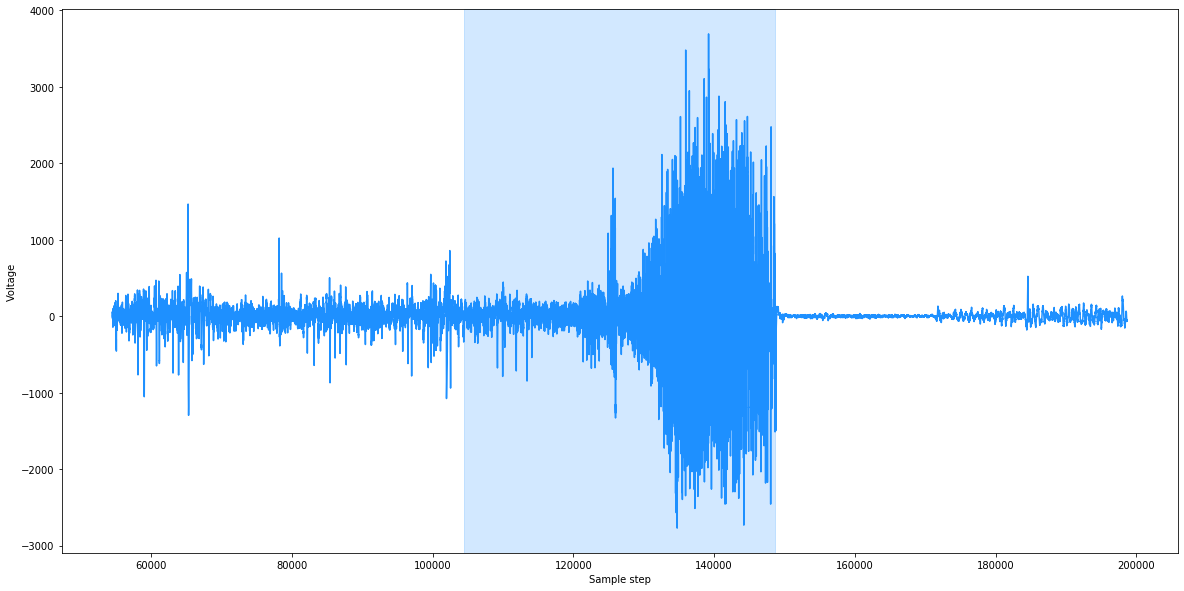

In [6]:
plot_one_signal(eegs[0][0][48] , ranges, 100000, seizure_id=0)

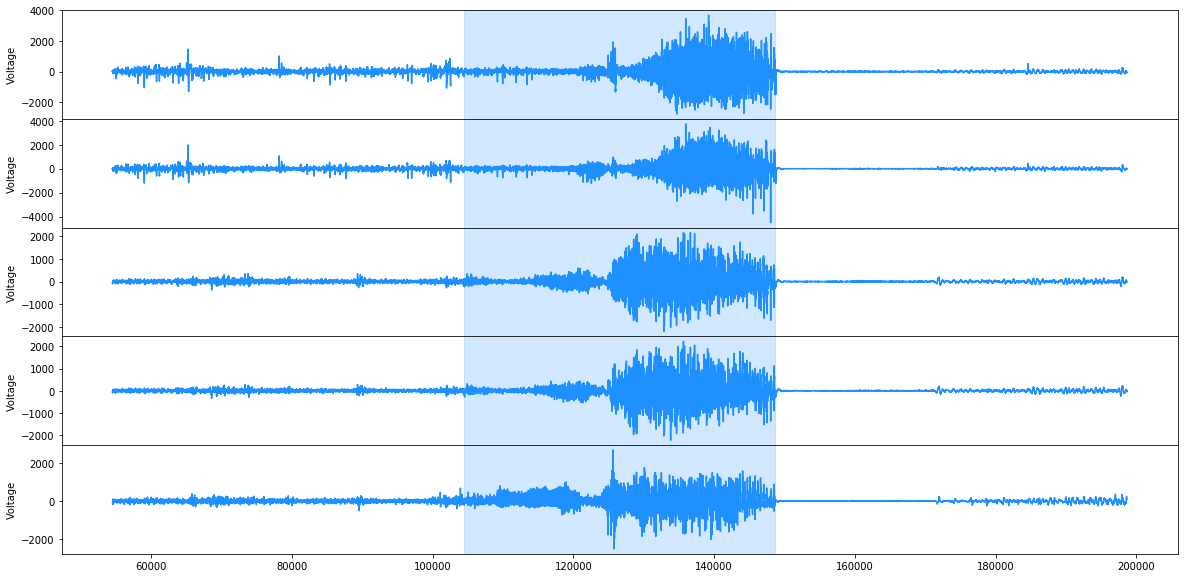

In [7]:
plot_multiple_signals(eegs[0][0], [48, 49, 56, 57, 20], ranges, 100000, seizure_id=0)

# Experiments

## Band power of iEEG

time 144163
data 1843200


[]

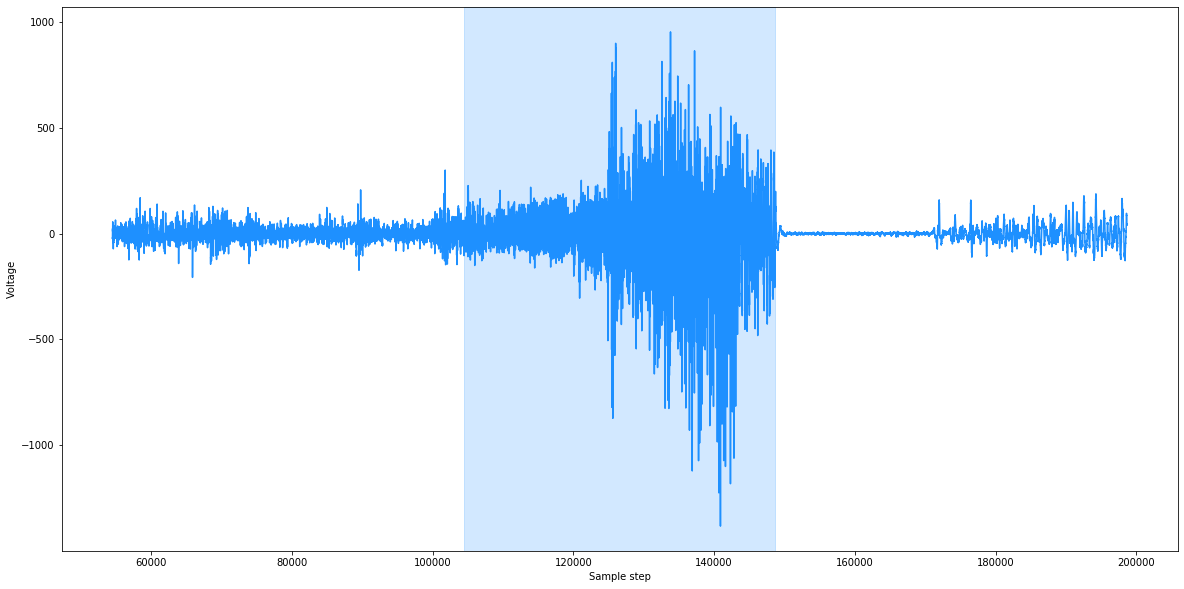

In [8]:
plot_one_signal(eegs[0][0][15] , ranges, 100000, seizure_id=0)

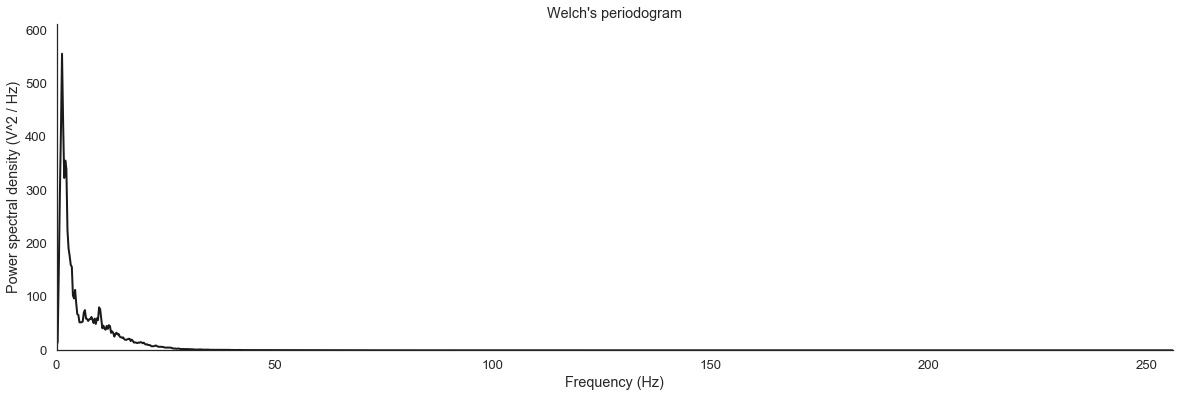

In [9]:
from scipy import signal
import seaborn as sns
sns.set(font_scale=1.2)

sf = 512.
# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(eegs[0][0][15], sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(20, 6))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

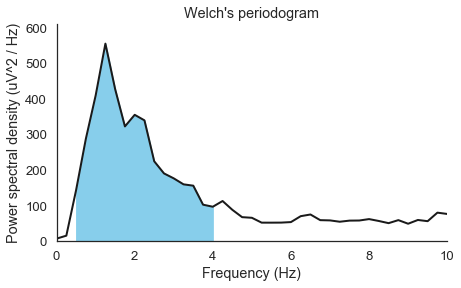

In [10]:
# Define delta lower and upper limits
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [11]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)

Absolute delta power: 965.285 uV^2


In [12]:
# Relative delta power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Relative delta power: 0.559


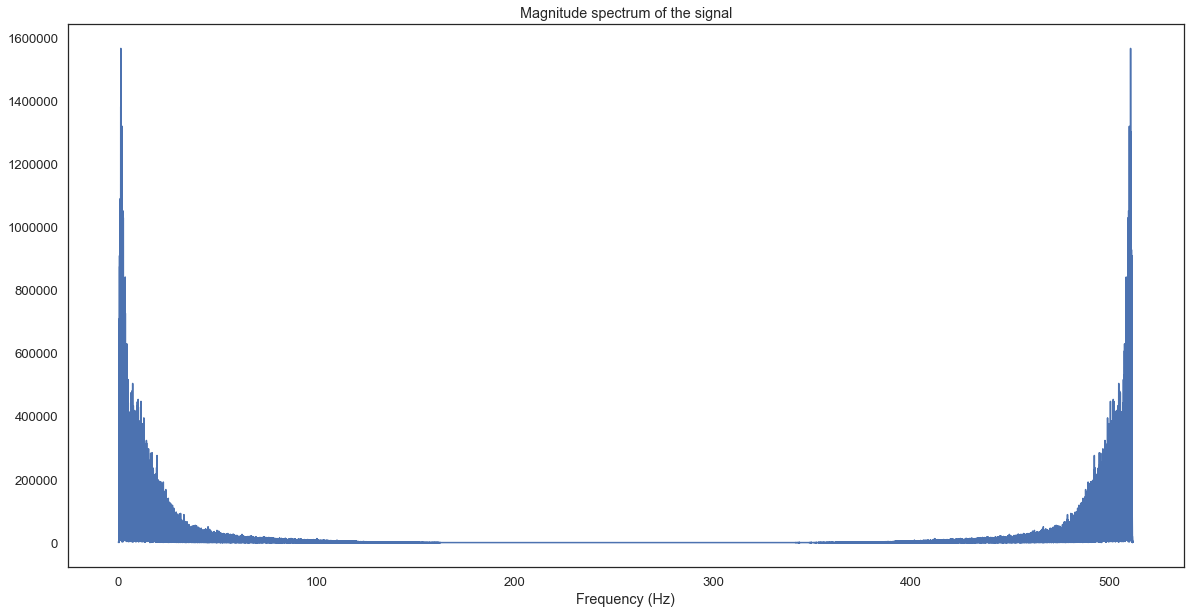

In [13]:
eeg1=eegs[0][0][15] 
fft1 = scipy.fft(eeg1)
f = np.linspace (0,sf,len(eeg1), endpoint=False)
plt.figure(1, figsize=(20,10))
plt.plot (f, abs (fft1))
plt.title ('Magnitude spectrum of the signal')
plt.xlabel ('Frequency (Hz)')
plt.show()